<a href="https://colab.research.google.com/github/bangpc/Region_Growing_and_Region_Merging_Segmentation/blob/master/python/Region_Growing/Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown upload image to colab
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg


In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
#@markdown Read image
img =  cv2.imread('X2kkz.jpg')

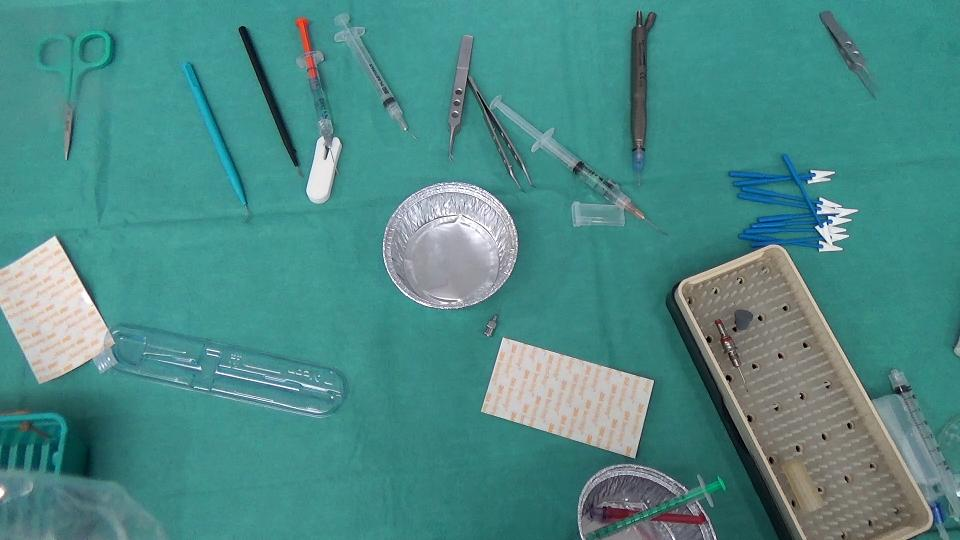

In [3]:
cv2_imshow(img)

In [4]:
#@markdown Create MSER object (Maximally stable extremal regions)
mser = cv2.MSER_create()

In [38]:
#@title Converting the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()

In [39]:
#@title Applying median filter
# gray = cv2.medianBlur(gray,3)

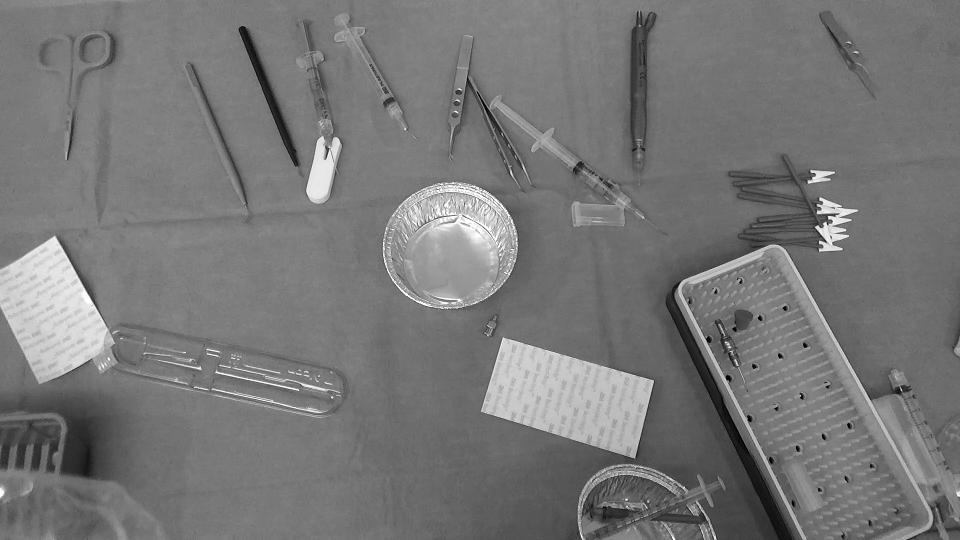

In [40]:
cv2_imshow(gray)

In [41]:
regions, _ = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(vis, hulls, 1, (0, 255, 0))

array([[[149, 156,  75],
        [148, 155,  74],
        [147, 154,  73],
        ...,
        [135, 141,  59],
        [132, 138,  56],
        [129, 135,  53]],

       [[148, 155,  74],
        [148, 155,  74],
        [148, 155,  74],
        ...,
        [134, 140,  58],
        [130, 136,  54],
        [126, 132,  50]],

       [[145, 152,  71],
        [146, 153,  72],
        [148, 155,  74],
        ...,
        [134, 140,  58],
        [132, 138,  56],
        [129, 135,  53]],

       ...,

       [[133, 130,  92],
        [131, 129,  89],
        [130, 127,  89],
        ...,
        [105, 110,  41],
        [  0, 255,   0],
        [107, 112,  43]],

       [[133, 129,  94],
        [131, 128,  90],
        [130, 126,  91],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [110, 114,  43]],

       [[132, 128,  93],
        [131, 127,  92],
        [131, 127,  92],
        ...,
        [111, 117,  46],
        [112, 116,  44],
        [110, 114,  42]]

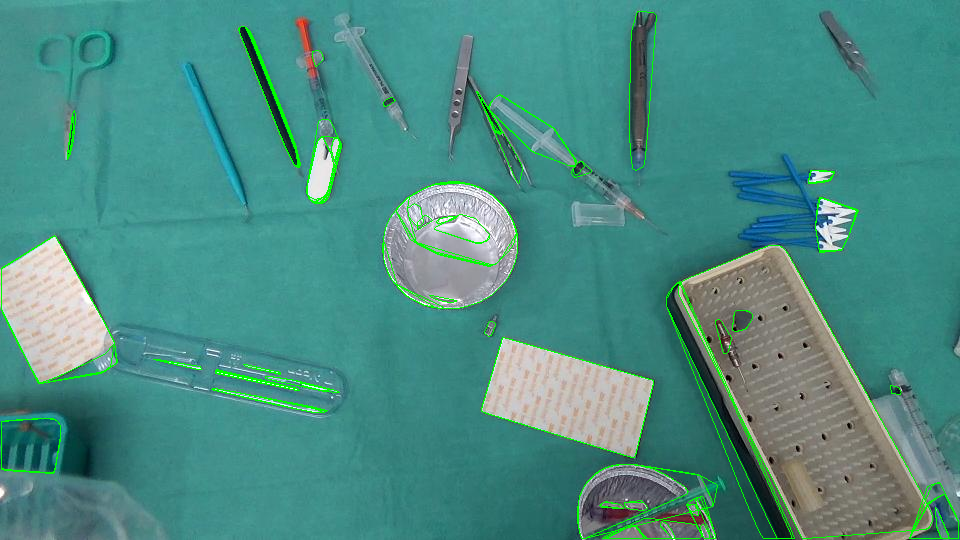

In [42]:
cv2_imshow(vis)

In [43]:
mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

In [44]:
for contour in hulls:
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
region_only = cv2.bitwise_and(img, img, mask=mask)

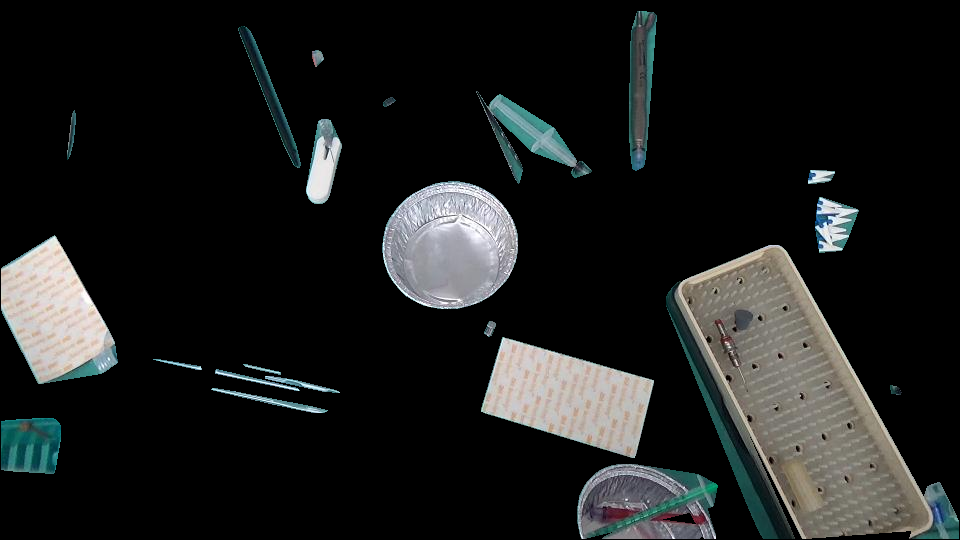

In [45]:
cv2_imshow(region_only)